In [ ]:
from google.colab import drive
drive.mount("/content/Drive", force_remount=True)

In [ ]:
import pandas as pd
import numpy as np
np.random.seed(1337)
from keras import Sequential
from keras.utils import Sequence
from keras.layers import LSTM, Dense, Masking, GRU
import numpy as np
import keras
from keras.utils import np_utils
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Embedding, Dense, Input, concatenate, Layer, Lambda, Dropout, Activation
import datetime
from datetime import datetime
from keras.callbacks import ModelCheckpoint, EarlyStopping, Callback, TensorBoard
import tensorflow as tf
import tensorflow_hub as hub
from keras import initializers as initializers, regularizers, constraints
from keras import backend as K
import numpy as np
from numpy import load
import pandas as pd
from google.colab import drive

Using TensorFlow backend.


In [ ]:
dataset = pd.read_csv('/content/Drive/My Drive/LNLP/dataset.csv')
x_train0 = load("/content/Drive/My Drive/LNLP/EXP/Hierexp/XLNet/XLNet_train.npy", allow_pickle = True)
x_dev0 = load("/content/Drive/My Drive/LNLP/EXP/Hierexp/XLNet/XLNet_dev.npy", allow_pickle= True)

In [ ]:
dev = dataset.loc[dataset['split'] == 'dev']
train = dataset.loc[dataset['split'] == 'train']

In [ ]:
y_train0 = []
for i in range(train.shape[0]):
  y_train0.append(train.loc[i,'label'])

y_dev0 = []
for i in range(dev.shape[0]):
  y_dev0.append(dev.loc[i+32305,'label'])

In [ ]:
from keras import layers
from tensorflow import keras
# model.add(AttentionLayer())
text_input = Input(shape=(None,768,), dtype='float32', name='text') #1 sent_input
print("text input",text_input)
l_mask = layers.Masking(mask_value=-99.)(text_input) #2 sent_encoder
print("l_mask",l_mask)
# Which we encoded in a single vector via a LSTM
encoded_text = layers.Bidirectional(GRU(100,return_sequences=True))(l_mask) #3 sent_gru
encoded_text1 = layers.Bidirectional(GRU(100,return_sequences=False))(encoded_text) #4
# out_dense = layers.Dense(200, activation='relu')(encoded_text1) #5 sent_dense
sent_drop = Dropout(0.5,name='sent_dropout')(encoded_text1)
# And we add a softmax classifier on top
out1 = layers.Dense(30, activation='relu')(sent_drop) #7 preds
out = layers.Dense(1, activation='sigmoid')(out1)
model = Model(text_input,out)

text input Tensor("text:0", shape=(None, None, 768), dtype=float32)
l_mask Tensor("masking_1/mul:0", shape=(None, None, 768), dtype=float32)


In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text (InputLayer)            (None, None, 768)         0         
_________________________________________________________________
masking_1 (Masking)          (None, None, 768)         0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 200)         521400    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 200)               180600    
_________________________________________________________________
sent_dropout (Dropout)       (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 30)                6030      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31  

In [ ]:
model.load_weights('/content/Drive/My Drive/LNLP/EXP/Hierexp/XLNet_2layer_noatt_3epoch/XGnA_epoch3.h5')

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

In [ ]:
df = pd.read_csv("/content/Drive/My Drive/LNLP/dataset.csv")
x_test0 = load(test_emb_path, allow_pickle= True)
y_test0 = []
test_set = df.query(" split=='test' ")
for i,lb in enumerate(test_set["label"]):
  y_test0.append(lb)

# x_test_new = []
# for i in range(df.shape[0]):
#   x_test_new.append(x_test0[df.loc[i,'emb_no']])

In [ ]:
print(y_test0[1])

0


In [ ]:
test_emb_path = "/content/Drive/My Drive/LNLP/EXP/Hierexp/XLNet/XLNet_test.npy"

In [ ]:
df = pd.read_csv("/content/Drive/My Drive/LNLP/dataset.csv")
x_test0 = load(test_emb_path, allow_pickle= True)
y_test0 = []
test_set = df.query(" split=='test' ")
for i,lb in enumerate(test_set["label"]):
  y_test0.append(lb)

# x_test_new = []
# for i in range(df.shape[0]):
#   x_test_new.append(x_test0[df.loc[i,'emb_no']])

In [ ]:
#x_test0 = x_test_new

In [ ]:
print(len(x_test0[1]), len(y_test0))

5 1517


In [ ]:
new_test_x = []
new_test_y = []
for i in range(len(x_test0)):
  full_emb = x_test0[i]
  label = y_test0[i]
  new_test_x.append(full_emb)
  new_test_y.append(label)
  for j in range(len(full_emb)):
    emb_occluded = []
    for k in range(len(full_emb)):
      if(k==j):
        emb_occluded.append(np.zeros(768))
      else:
        emb_occluded.append(full_emb[k])

    new_test_x.append(emb_occluded)
    new_test_y.append(label)

In [ ]:
print(len(new_test_x), len(new_test_y))
print(new_test_x[1])
print(len(new_test_y))

18668 18668
[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0

In [ ]:
print(y_test0[0])

1


In [ ]:
print(len(new_test_x[0]),len(new_test_x[1]),len(new_test_x[2]),len(new_test_x[3]),len(new_test_x[10]))

8 8 8 8 5


In [ ]:
num_features= 768
def new_test_generator():
    x_list= new_test_x
    y_list =  new_test_y
    # Generate batches
    while True:
      for b in range(batches_per_epoch_test):
        longest_index = (b + 1) * batch_size_test - 1
        timesteps = len(max(new_test_x[:(b + 1) * batch_size_test][-batch_size_test:], key=len))
        # print(len(df_train['emb'].to_list()[:b+batch_size][-7:]))
        x_train = np.full((batch_size_test, timesteps, num_features), -99.)
        y_train = np.zeros((batch_size_test,  1))
        for i in range(batch_size_test):
            li = b * batch_size_test + i
            # print("runs")
            # print(len(x_list[li]))
            # print("li", li)
            # print(x_train[i, 0:len(x_list[li]), :].shape, len(x_list[li]))
            x_train[i, 0:len(x_list[li]), :] = x_list[li]
            y_train[i] = y_list[li]
        yield x_train, y_train



In [ ]:
num_sequences_test = len(new_test_x)
print(num_sequences_test)
batch_size_test = 52
if(num_sequences_test%batch_size_test == 0):
  batches_per_epoch_test = int(num_sequences_test/batch_size_test)
else:
  batches_per_epoch_test = int(num_sequences_test/batch_size_test) + 1
#assert batch_size_val * batches_per_epoch_val == num_sequences_val
num_features= 768
model.evaluate_generator(new_test_generator(), steps= batches_per_epoch_test)


18668


[0.3961784541606903, 0.7571244835853577]

In [ ]:
preds = model.predict_generator(new_test_generator(), steps= batches_per_epoch_test)

In [ ]:
print(len(preds))

18668


In [ ]:
scores = []

startpt = 0
for i in range(len(x_test0)):
  n_emb_for_this_doc = x_test0[i].shape[0]
  tot_embs = n_emb_for_this_doc + 1
  act_pred = preds[startpt] > 0.5

  chunk_scores = []
  for j in range(tot_embs-1):
    if(act_pred):
      chunk_scores.append(-1*(preds[startpt+j+1]-preds[startpt]))
    else:
      chunk_scores.append(preds[startpt+j+1]-preds[startpt])

  scores.append(chunk_scores)
  startpt += tot_embs

In [ ]:
print(len(scores))

1517


In [ ]:
l_scores = []
for s in scores:
  c_s =[]
  for c in s:
    c_s.append(c[0])

  l_scores.append(c_s)

In [ ]:
print(l_scores[0])

[0.052425325, -0.012476683, 0.005442083, 0.027202427, 0.0035074353, -0.0069247484, 0.03106457, 0.13127178]


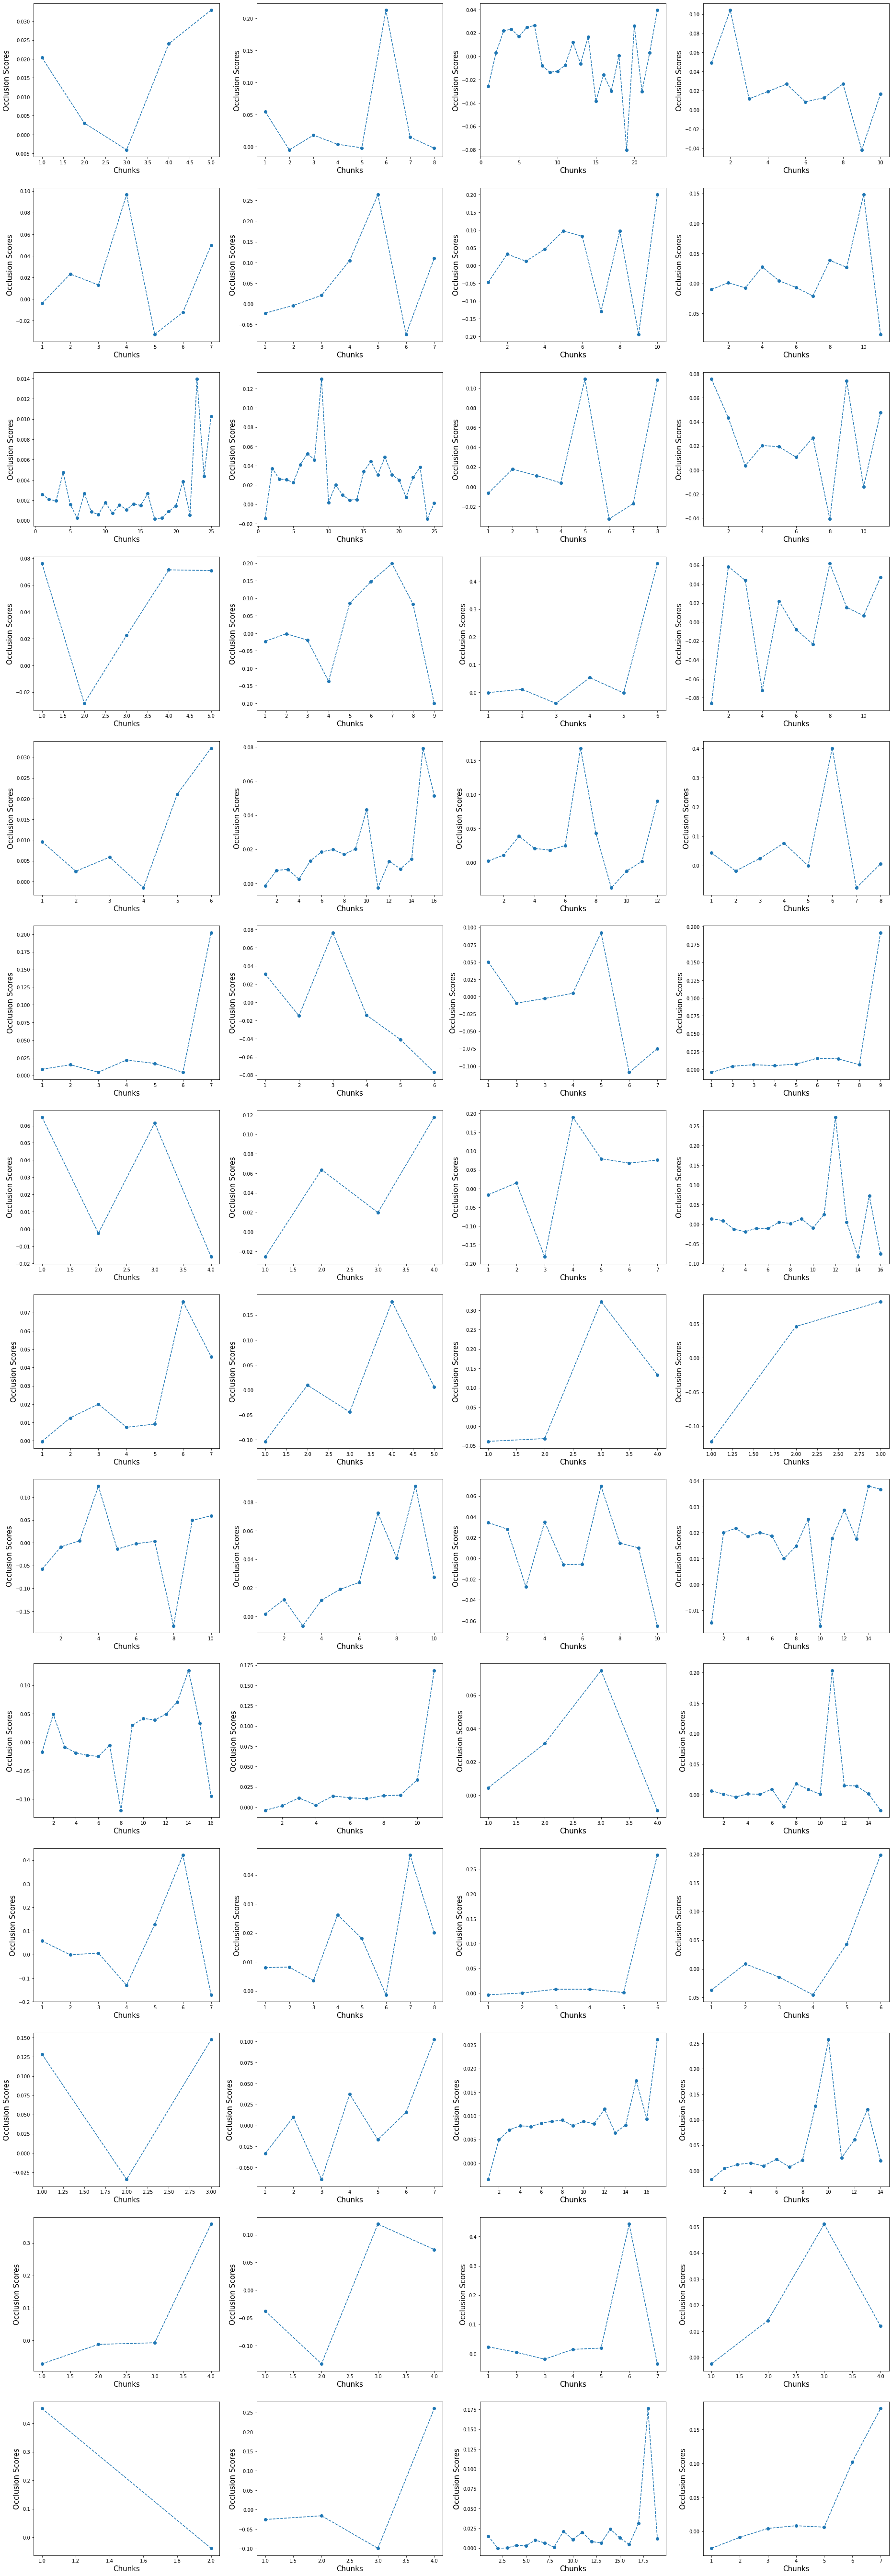

In [ ]:
# import matplotlib.pyplot as plt

# fig, axs = plt.subplots(14, 4, figsize=(32, 98))
# l=0
# r=0
# for sc in l_scores:
#   plt.xticks(list(range(1,len(sc)+1,1)))
  
#   y = list(range(1,len(sc)+1,1))
#   axs[l,r].plot(y, sc, marker='o', linestyle='dashed')
#   axs[l,r].set_xlabel('Chunks',fontsize = 15.0)
#   axs[l,r].set_ylabel('Occlusion Scores',fontsize = 15.0)

#   r+=1
#   if(r==4):
#     l+=1
#     r=0

In [ ]:
fig.savefig("Occweights_56.png")

In [ ]:


scores = []
act_predictions = []

startpt = 0
for i in range(len(x_test0)):
  n_emb_for_this_doc = x_test0[i].shape[0]
  tot_embs = n_emb_for_this_doc + 1
  act_pred = preds[startpt] > 0.5
  act_predictions.append(act_pred)
  startpt += tot_embs

In [ ]:
for i in range(len(act_predictions)):
  print("{:} true = {:}, pred = {:}, iscorrect = {:}".format(i+1,y_test0[i],act_predictions[i], y_test0[i] == act_predictions[i]))

1 true = 1, pred = [ True], iscorrect = [ True]
2 true = 0, pred = [ True], iscorrect = [False]
3 true = 0, pred = [False], iscorrect = [ True]
4 true = 1, pred = [ True], iscorrect = [ True]
5 true = 0, pred = [False], iscorrect = [ True]
6 true = 0, pred = [False], iscorrect = [ True]
7 true = 1, pred = [False], iscorrect = [False]
8 true = 0, pred = [ True], iscorrect = [False]
9 true = 0, pred = [False], iscorrect = [ True]
10 true = 1, pred = [False], iscorrect = [False]
11 true = 0, pred = [False], iscorrect = [ True]
12 true = 0, pred = [ True], iscorrect = [False]
13 true = 1, pred = [ True], iscorrect = [ True]
14 true = 0, pred = [False], iscorrect = [ True]
15 true = 1, pred = [False], iscorrect = [False]
16 true = 1, pred = [False], iscorrect = [False]
17 true = 0, pred = [ True], iscorrect = [False]
18 true = 0, pred = [False], iscorrect = [ True]
19 true = 0, pred = [False], iscorrect = [ True]
20 true = 1, pred = [ True], iscorrect = [ True]
21 true = 1, pred = [ True], 

In [ ]:
g_to_be = 0

for i in range(25):
  found = False
  for chunks in l_scores:
    if(len(chunks) == i+1):
      found=True
  
  if(found):
    g_to_be+=1

In [ ]:
print(g_to_be)

25


In [ ]:
a= []
a.append([1,1,1])
a.append([2,2,2])
b = np.mean(a, axis=0)
print(b)

[1.5 1.5 1.5]


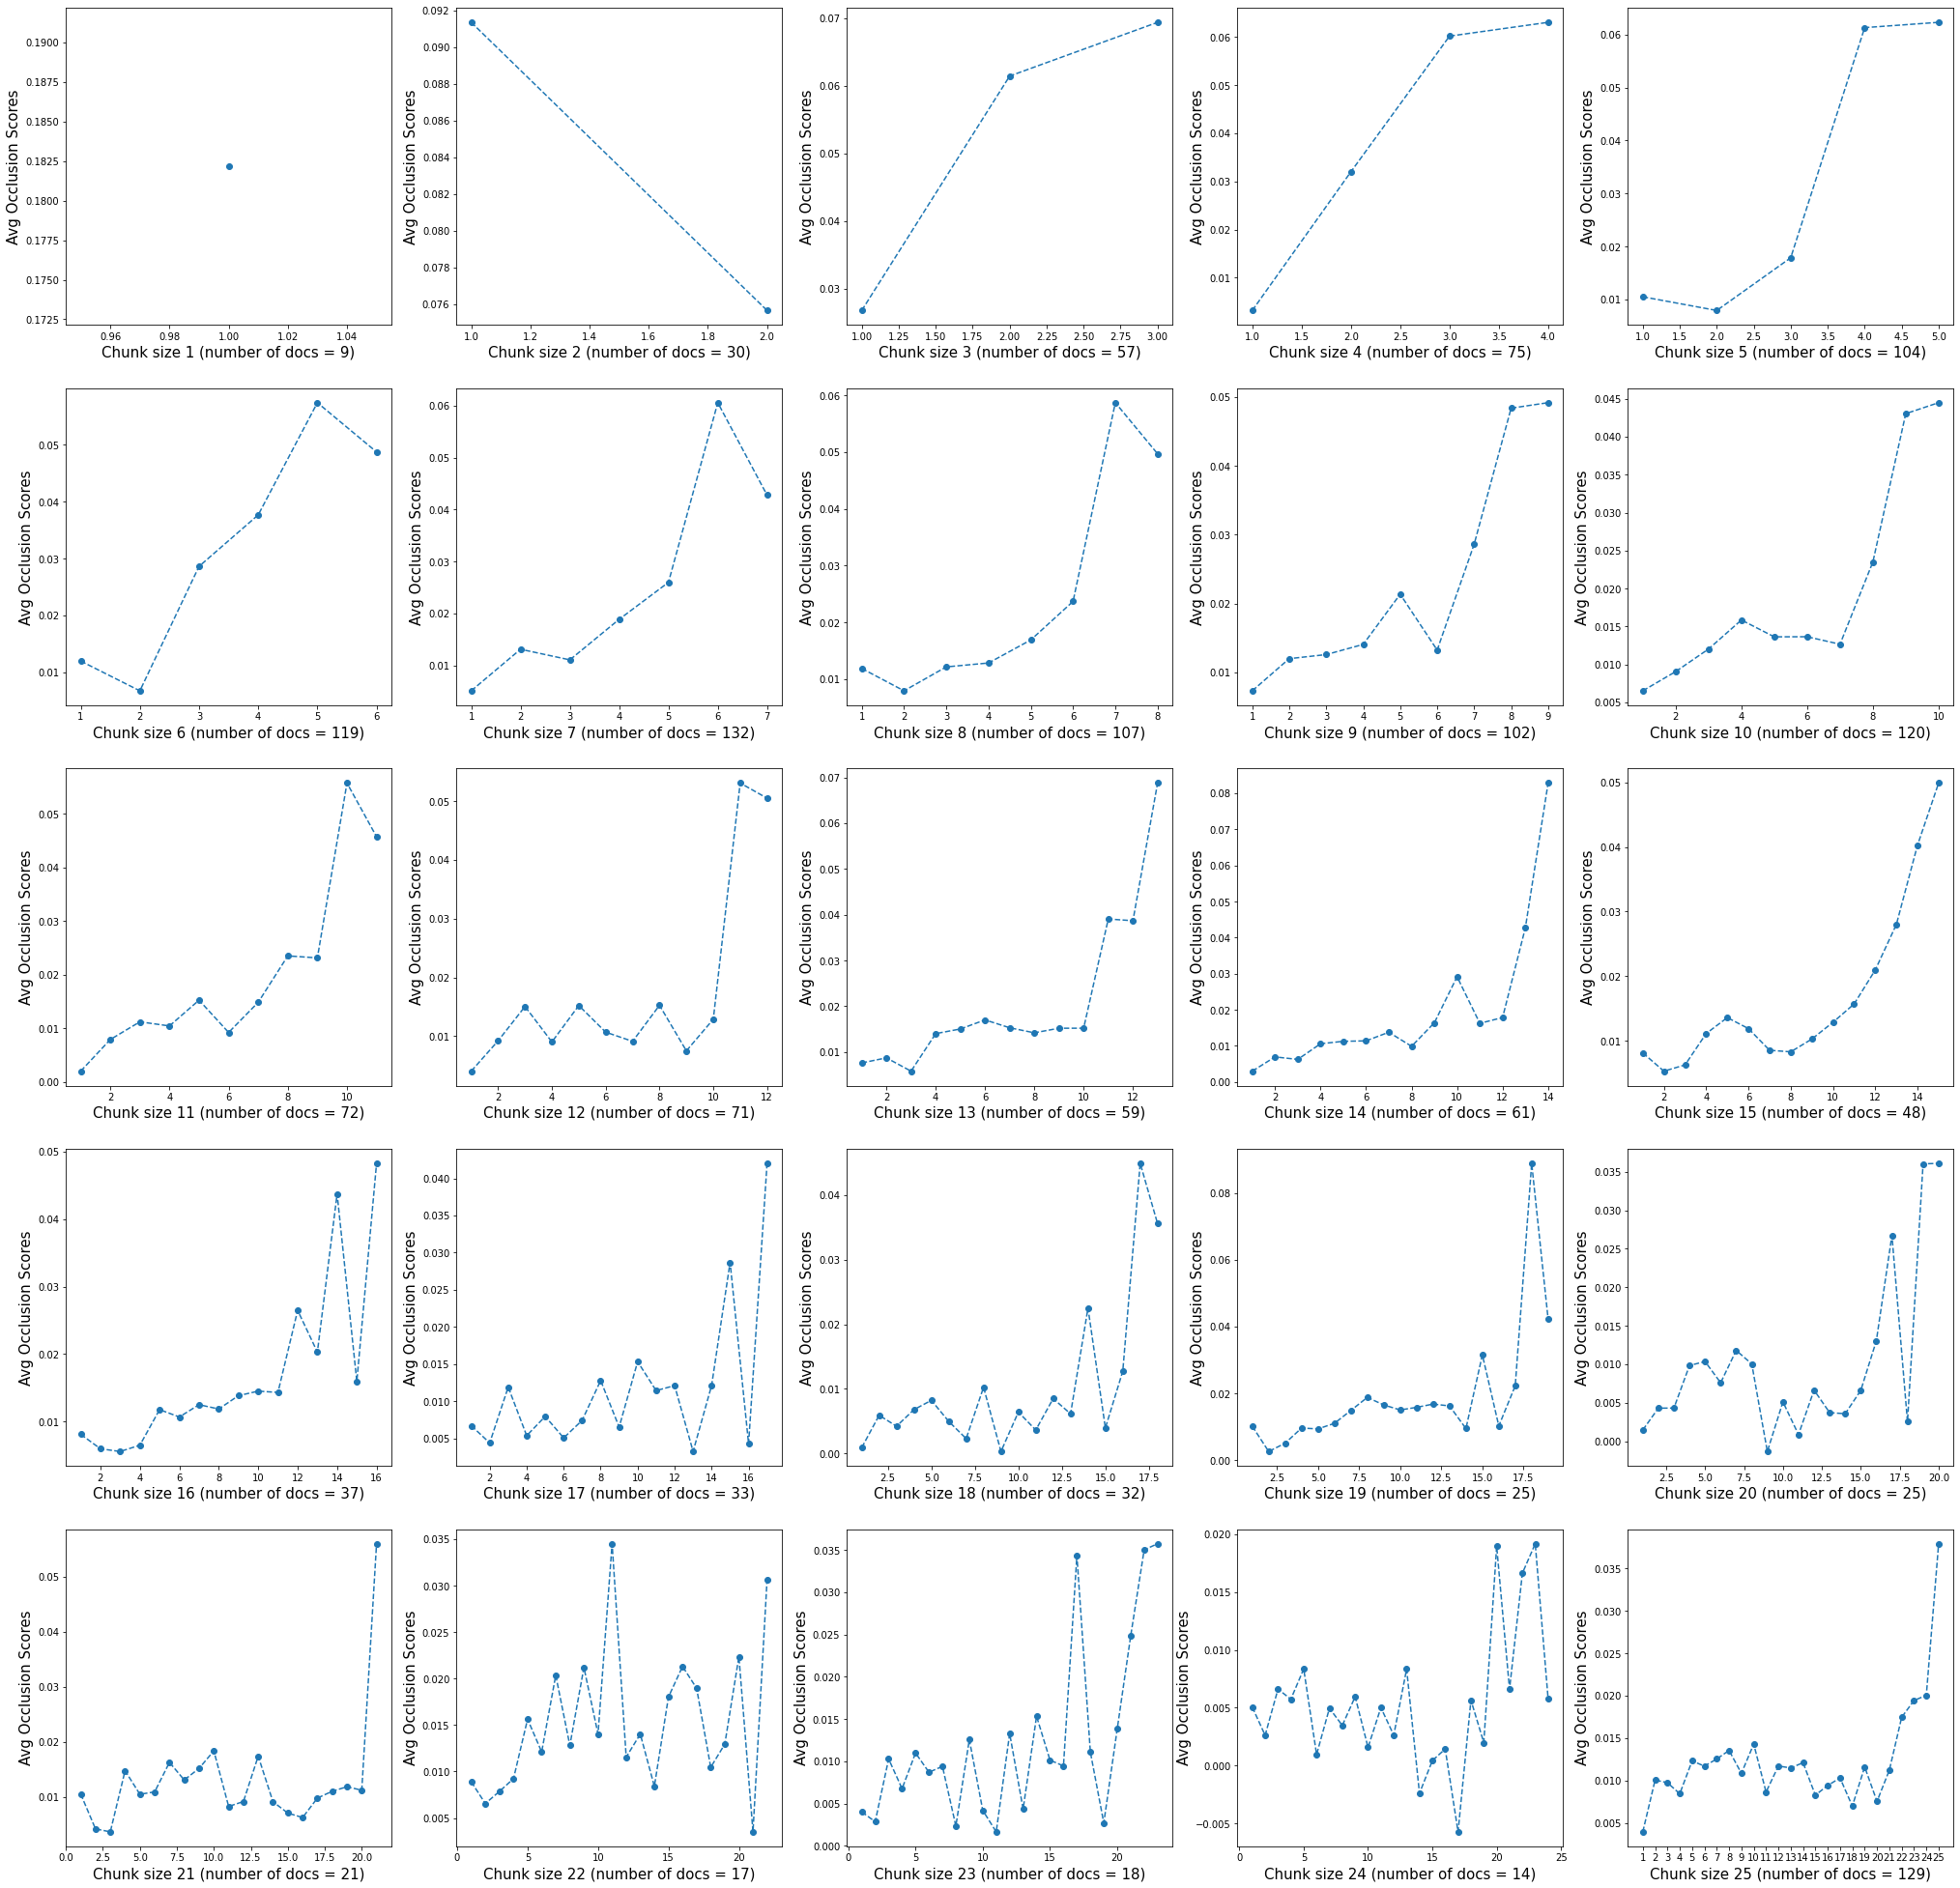

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(5, 5, figsize=(35, 35))
l=0
r=0

for i in range(25):
  found = False
  same_len_chunks = []

  for chunks in l_scores:
    if(len(chunks) == i+1):
      found=True
      same_len_chunks.append(chunks)

  if(found):
    mean_scores = np.mean(same_len_chunks, axis=0)
    plt.xticks(list(range(1,len(mean_scores)+1,1)))
    y = list(range(1,len(mean_scores)+1,1))
    axs[l,r].plot(y, mean_scores, marker='o', linestyle='dashed')
    xlabel_str = 'Chunk size ' + str(len(mean_scores)) + " (number of docs = " + str(len(same_len_chunks)) + ")"
    axs[l,r].set_xlabel(xlabel_str,fontsize = 15.0)
    axs[l,r].set_ylabel('Avg Occlusion Scores',fontsize = 15.0)
    r+=1
    if(r==5):
      l+=1
      r=0

In [ ]:
fig.savefig("Occavgall.png")

In [ ]:
np.save("/content/Drive/My Drive/LNLP/EXP/Hierexp/XLNet_2layer_noatt_3epoch/occwts.npy", l_scores)